In [3]:
import sys
import seaborn as sns
import patchworklib as pw 

## Tips to combine multiple matplotlib-related plots using patchworklib.
[Patchworklib](https://github.com/ponnhide/patchworklib) is a universal composer of matplotlib-related plots (simple matplotlib plots, Seaborn plots (both axis-level and figure-level), and plotnine plots). This library is inspired by [patchwork](https://patchwork.data-imaginist.com/) for ggplot2. Accordingly, as original patchwork, users can easily align matplotlib plots with only "/" and "|" operators. Although a good subplot composer, "subplot_mosaic" is provided from matplotlib formally, I believe the way of patchworlib is more straightforward and more flexible.

Additionally, several third-party libraries based on matplotlib, such as plotnine and seaborn, provide functions to generate beautiful plots with simple python codes, but many of those plots cannot be handled as matplotlib subplots. Therefore, their placement must be adjusted manually. Now, scientists spend their valuable time arranging figures.

Patchworklib provides a solution for the problem. By using patchworklib, any kind of seaborn and plotnine plots can be handled as matplotlib subplots.

## Tip1: Combineing Two Plots Side by Side
To combine two matplotlib plots so that both plots are side by side,  `|` operand can be used. In the following example, it arranges the two axes-level seaborn plots using `|` operand.

----
**Box: Brick class object**  
The patchworklib module provides the Brick class, the subclass of the 'matplotlib.axes.Axes' class .  
A subclass object can be joined with other Brick class objects by using "|" or "/" operands.

When creating an object of the Brick class, the `figsize,` parameter can be specified. However, this value is an initial value and will be adjusted automatically in the arrangement process. For example, if two Brick class objects are aligned side by side, the actual figure size of one Brick object will be resized to fit the other axes.

The savefig(filename=str) method returns `matplotlib.figure.Figure` class object. If a filename is given, the figure object can be output to the file.

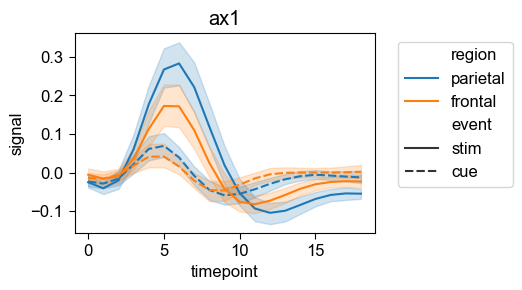

In [4]:
fmri = sns.load_dataset("fmri")
ax1 = pw.Brick(figsize=(3,2))
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri, ax=ax1)
ax1.move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax1.set_title("ax1")
ax1.savefig() 

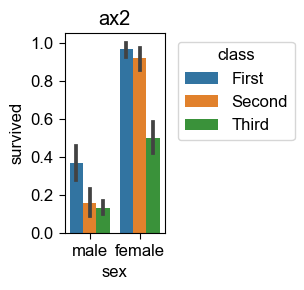

In [5]:
titanic = sns.load_dataset("titanic")
ax2 = pw.Brick(figsize=(1,2))
sns.barplot(x="sex", y="survived", hue="class", data=titanic, ax=ax2)
ax2.move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax2.set_title("ax2")
ax2.savefig()

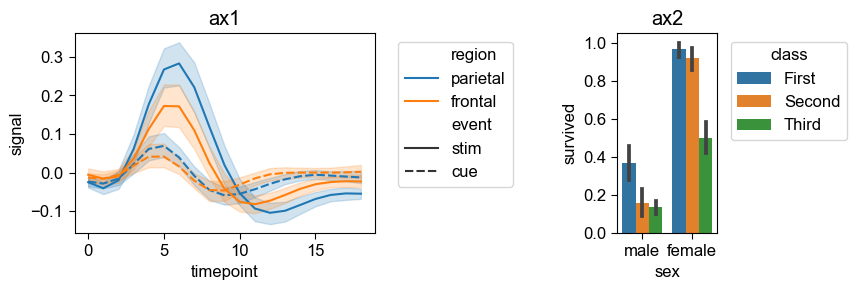

In [6]:
(ax1|ax2).savefig()

Of course, you can easily swap the positions of "ax1" and "ax2".

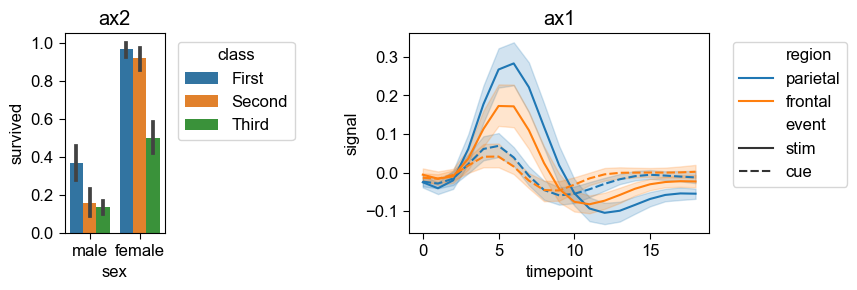

In [7]:
(ax2|ax1).savefig()

## Tips2: Combineing Plots one over the others
If you want to combine three plots such that one is on top of the other plots, please use "/" operator. 

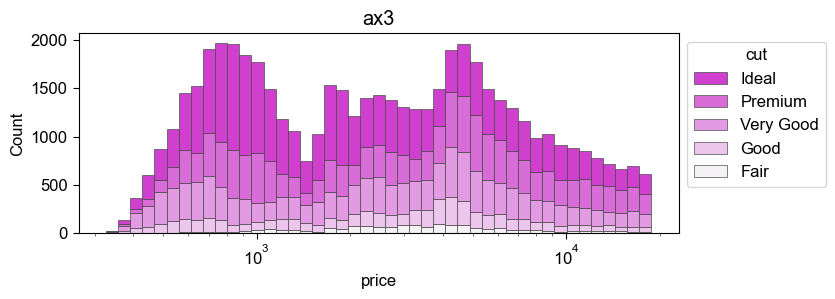

In [8]:
diamonds = sns.load_dataset("diamonds")
ax3 = pw.Brick(figsize=(6,2))
sns.histplot(diamonds, x="price", hue="cut", multiple="stack", palette="light:m_r", edgecolor=".3", linewidth=.5, log_scale=True, ax = ax3)
ax3.move_legend(new_loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax3.set_title("ax3")
ax3.savefig()

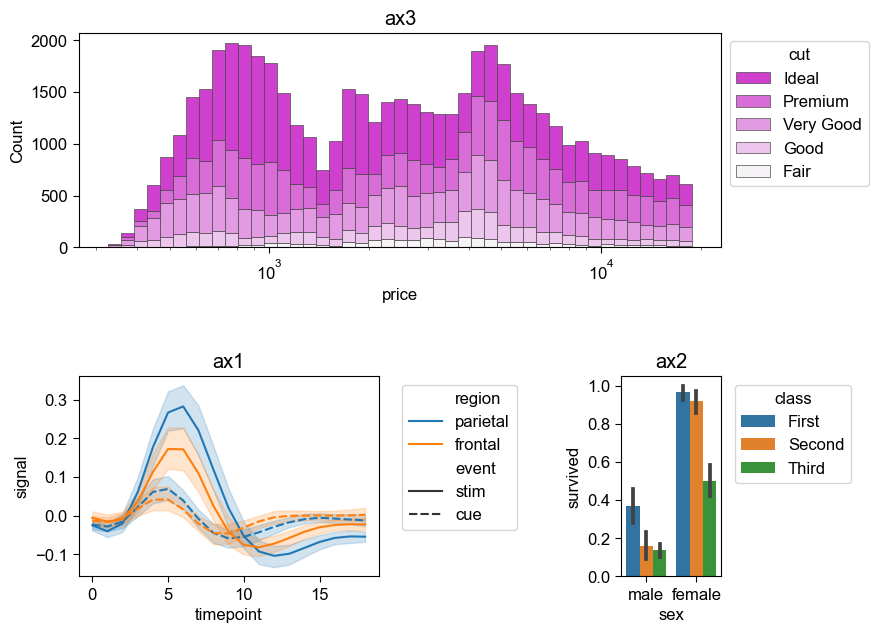

In [9]:
(ax3/(ax1|ax2)).savefig()

## Tips3: Position assignment in multiple plots.
By specifying the Brick objects in a set of Brick objects, you can adjust the position of the other Brick object to be aligned.  
In the following case, `ax4` is aligned to the right side of `ax2` in `ax123`. 

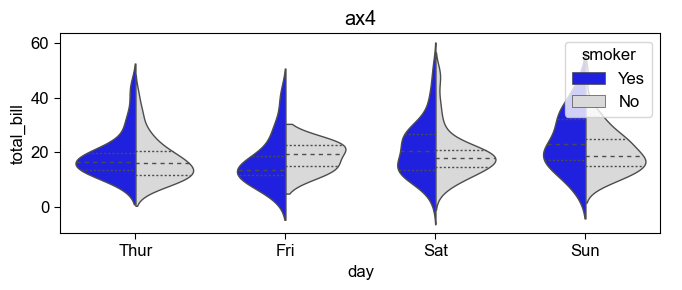

In [10]:
tips = sns.load_dataset("tips")
ax4 = pw.Brick(figsize=(6,2))
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
    split=True, inner="quart", linewidth=1,
    palette={"Yes": "b", "No": ".85"},
    ax=ax4)
ax4.set_title("ax4")
ax4.savefig()

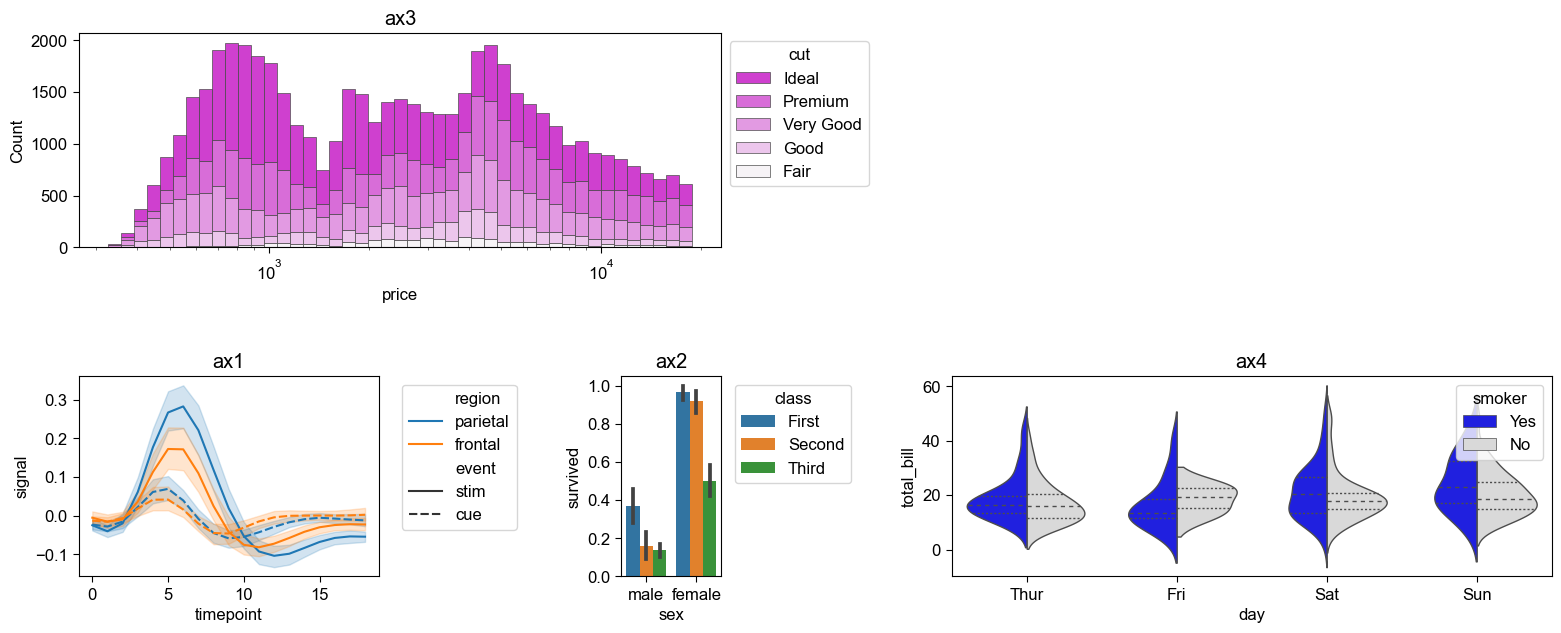

In [11]:
ax123  = ax3/(ax1|ax2)
ax1234 = (ax123[ax2]|ax4)
ax1234.savefig()

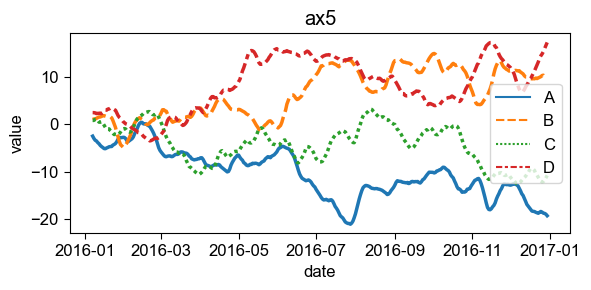

In [12]:
import numpy as np
import pandas as pd 
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()
ax5 = pw.Brick(figsize=(5,2))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax5)
ax5.set_xlabel("date")
ax5.set_ylabel("value")
ax5.set_title("ax5")
ax5.savefig()

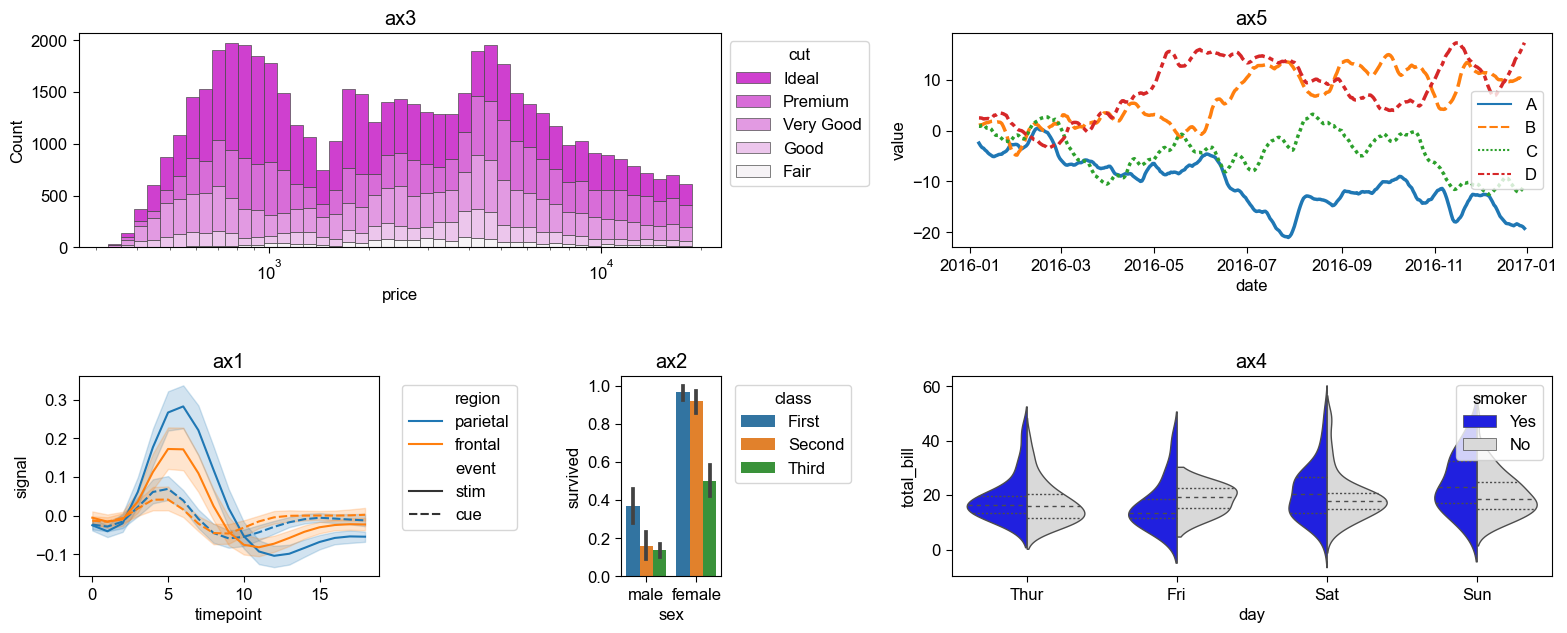

In [13]:
ax12345 = ax1234[ax3]|ax5
ax12345.savefig()

## Tips4: Arranging multiple plots so that their outlines are aligned.
Basically, patchworklib arrange subplots to align their axes. 
However, depending on the position of the legend box or text labels, you may want to align the outer frame containing them rather than the axes of subplots.
In such a case, please use `outline` attribute as follows. 

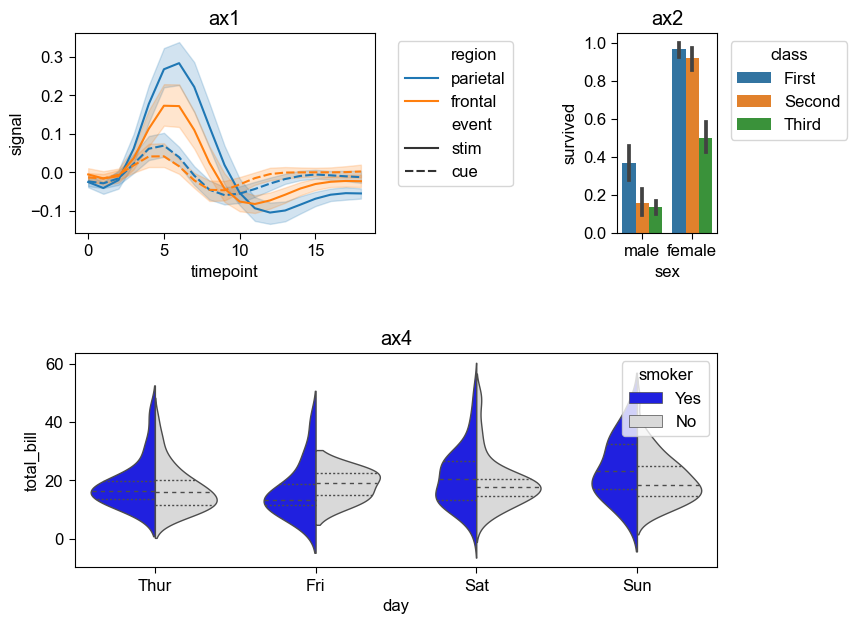

In [14]:
#Normal arrangement
((ax1|ax2)/ax4).savefig()

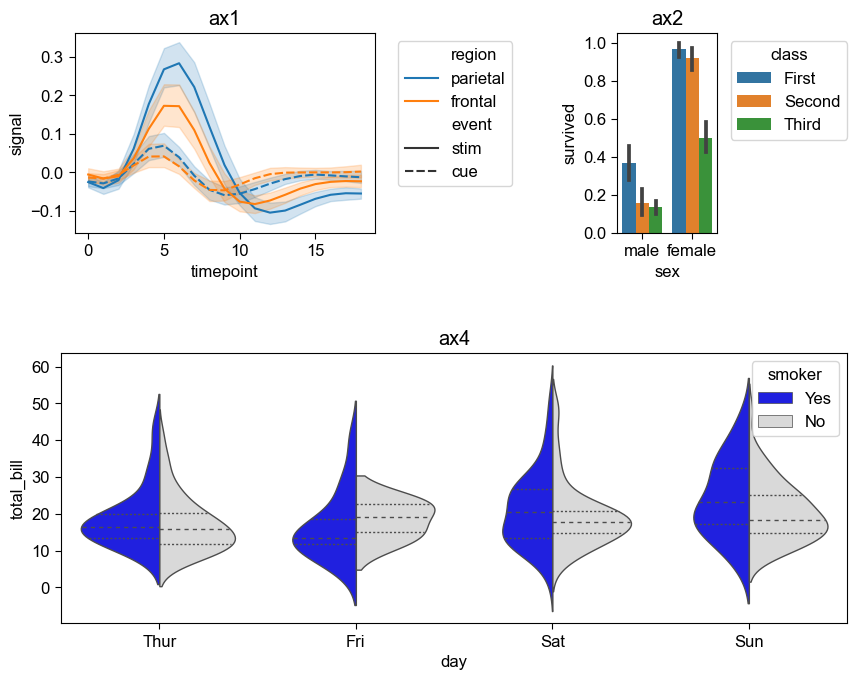

In [15]:
#Arrangement using `outline` attribute.
((ax1|ax2).outline/ax4.outline).savefig()

## Tips5: Arranging plotnine plots
[plotnine](https://plotnine.readthedocs.io/en/stable/) is an implementation of ggplot2 in Python. If you are ggplot2 user, plotnine may be the best solution for visualization when you use python instead of R. However, plotnine does not provide subplot composer such as [patchwork](https://patchwork.data-imaginist.com/) and [cowplot](https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html) in ggplot2.  
But, by using `patchworklib.load_ggplot` function, you can handle plotnine plots as subplots of matplotlib and arrange them with `/` and `|` operators. 

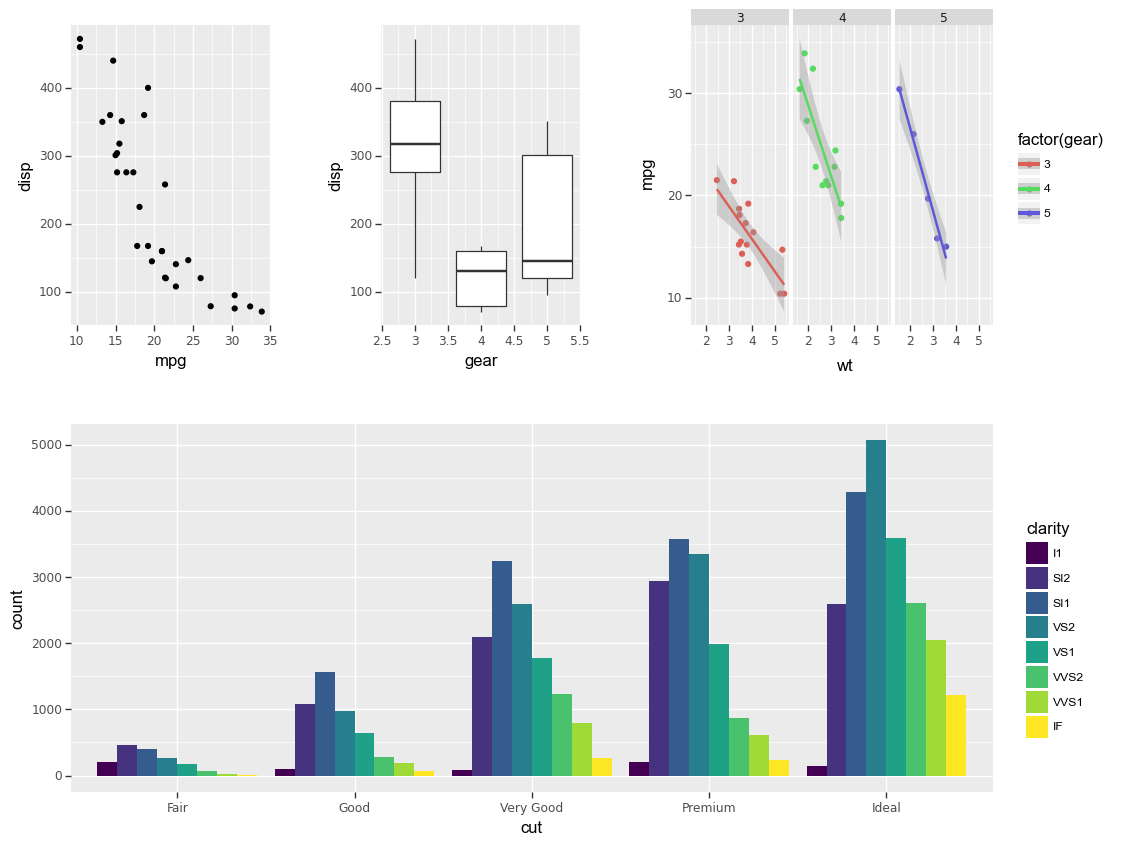

In [16]:
from plotnine import *
from plotnine.data import *
g1 = pw.load_ggplot(ggplot(mtcars) + geom_point(aes("mpg", "disp")), figsize=(2,3))
g2 = pw.load_ggplot(ggplot(mtcars) + geom_boxplot(aes("gear", "disp", group="gear")), figsize=(2,3))
g3 = pw.load_ggplot(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')) + geom_point() + stat_smooth(method='lm') + facet_wrap('~gear'), figsize=(3,3))
g4 = pw.load_ggplot(ggplot(data=diamonds) + geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge"), figsize=(5,2))
((g1|g2|g3)/g4).savefig()

## Tips6: Arranging figure-level seaborn plots
In generally, Figure-lavel seaborn plots cannot be composed with other plots. (If you don't know the difference between Figure-level and Axes-level seaborn plots, please see https://seaborn.pydata.org/tutorial/function_overview.html)  
However, by using `patchworklib.overwrite_axisgrid()` and `patchworklib.load_seaborngrid` functions, Figure-level seaborn plots can be handled as matplotlib subplots and can be composed with other plots.

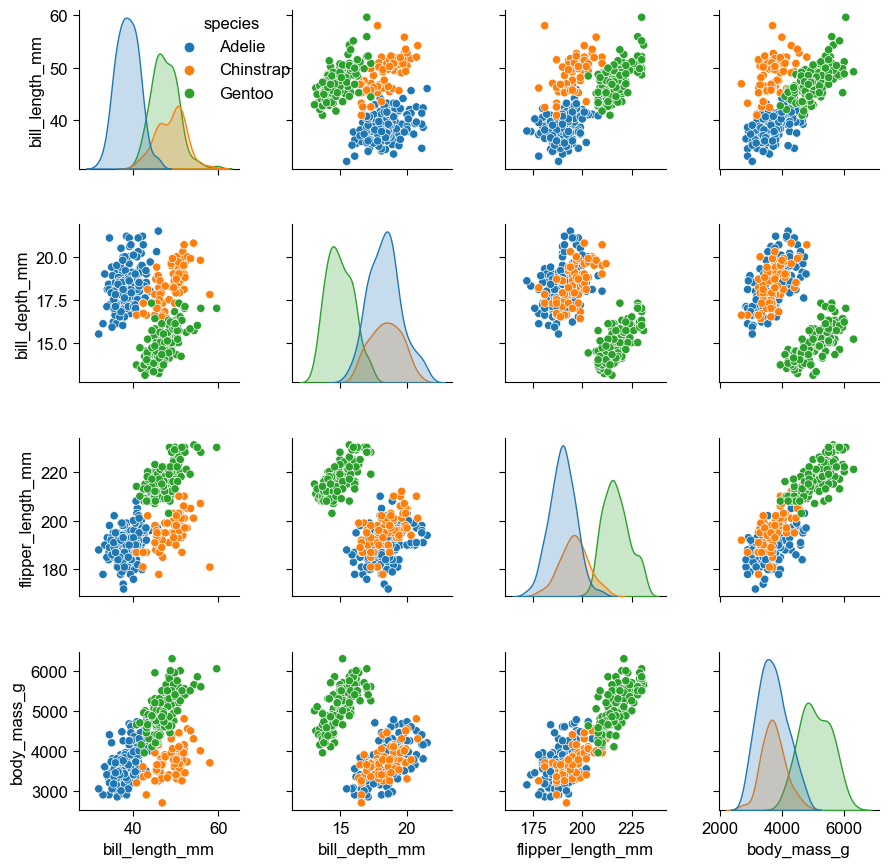

In [17]:
pw.overwrite_axisgrid() #When you use pw.load_seagorngrid, 'overwrite_axisgrid' should be executed.
df = sns.load_dataset("penguins")
g1 = sns.pairplot(df, hue="species")
g1 = pw.load_seaborngrid(g1, figsize=(8,8))
g1.move_legend("upper left", bbox_to_anchor=(0.17,1.01))
g1.savefig()

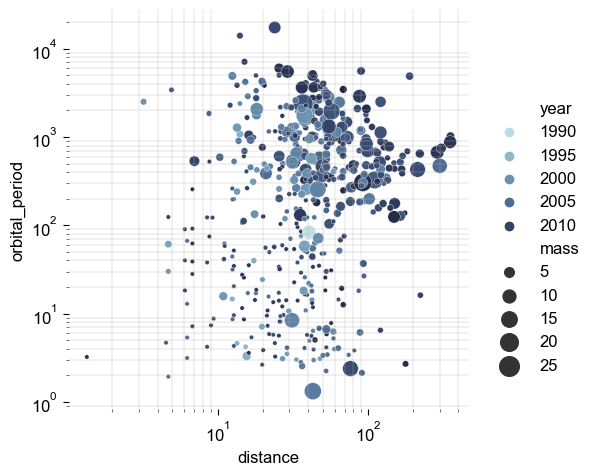

In [18]:
planets = sns.load_dataset("planets")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g2 = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g2.set(xscale="log", yscale="log")
g2.ax.xaxis.grid(True, "minor", linewidth=.25)
g2.ax.yaxis.grid(True, "minor", linewidth=.25)
g2.despine(left=True, bottom=True)
g2 = pw.load_seaborngrid(g2, figsize=(4,4))
g2.savefig()

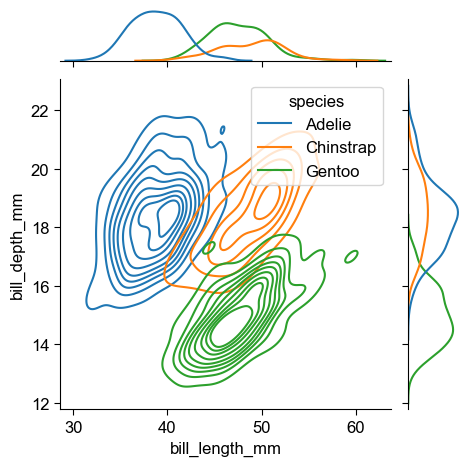

In [19]:
penguins = sns.load_dataset("penguins")
g3 = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)
g3 = pw.load_seaborngrid(g3, figsize=(4,4))
g3.savefig()

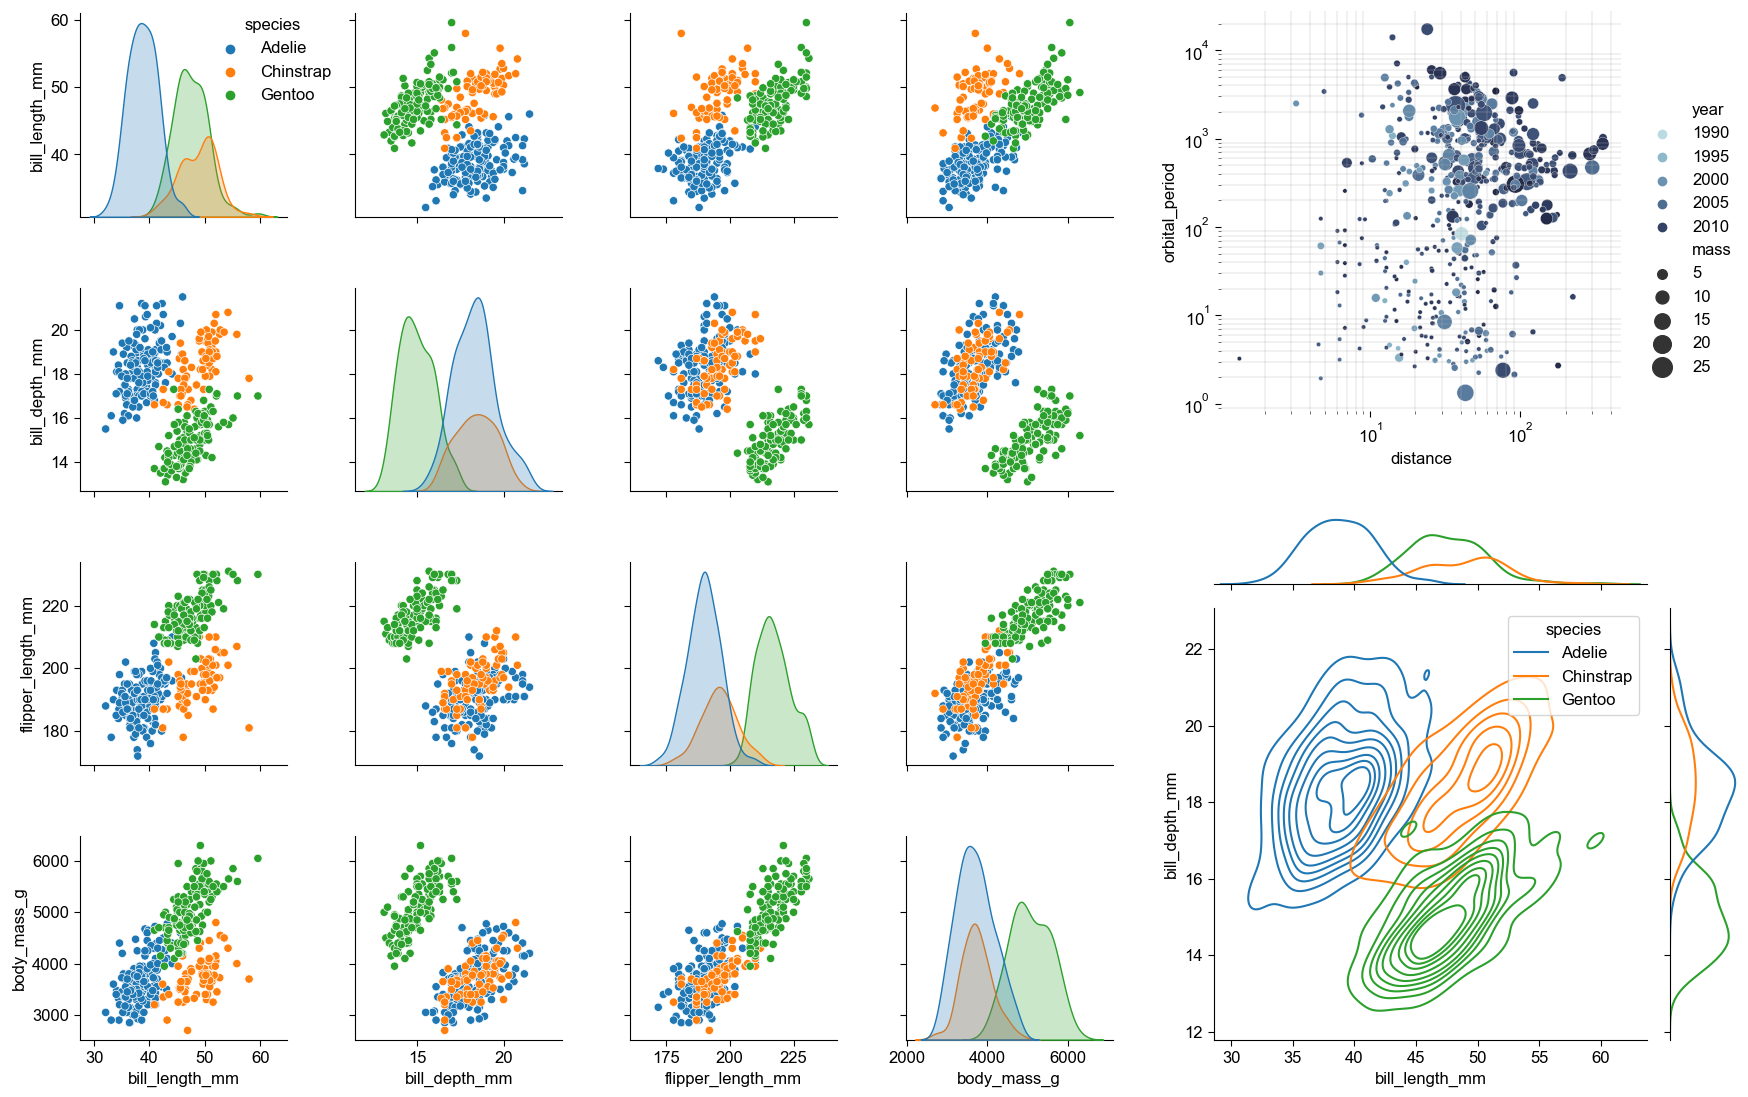

In [20]:
(g1.outline|(g2.outline/g3.outline).outline).savefig()